#**Breast Cancer Classification**

To classify the Breast cancer data points as - Malignant vs. Benign.


*   Malignant tumors are cancerous and have the potential to spread to other parts of the body, invading nearby tissues and organs.
*   Benign tumors are non-cancerous and do not spread to other parts of the body.





# **Data Fetching and Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

In [ ]:
warnings.filterwarnings('ignore')



font = {'family' : 'Monospace',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)  # pass in the font dict as kwargs


df = pd.read_csv("/content/drive/MyDrive/MIS-515_PR/data2.csv")
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# to determine the dimensions of a DataFrame
df.shape
shape = df.shape

print("Number of rows:", shape[0])
print("Number of columns:", shape[1])


total_elements = df.size

print("Total number of elements in the DataFrame:", total_elements)

Number of rows: 569
Number of columns: 33
Total number of elements in the DataFrame: 18777


In [ ]:
# Checking Null values

df.isnull().values.any()

df.isnull().values.sum()

569

In [ ]:
df.isnull().values.any()

True

In [ ]:
# provides descriptive statistics for the numerical columns in the DataFrame
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
mapDiag = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(mapDiag)

In [ ]:
features = list(df.columns[2:32])
featuresdf = df[features]
target = df['diagnosis']

In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# **EDA (Exploratory Data Analysis)**


In [ ]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = featuresdf.dtypes == int
mi_scores = mutual_info_regression(featuresdf, target, discrete_features= discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=featuresdf.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = featuresdf.dtypes == int
mi_scores = mutual_info_regression(featuresdf, target, discrete_features= discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=featuresdf.columns)
mi_scores = mi_scores.sort_values(ascending=False)

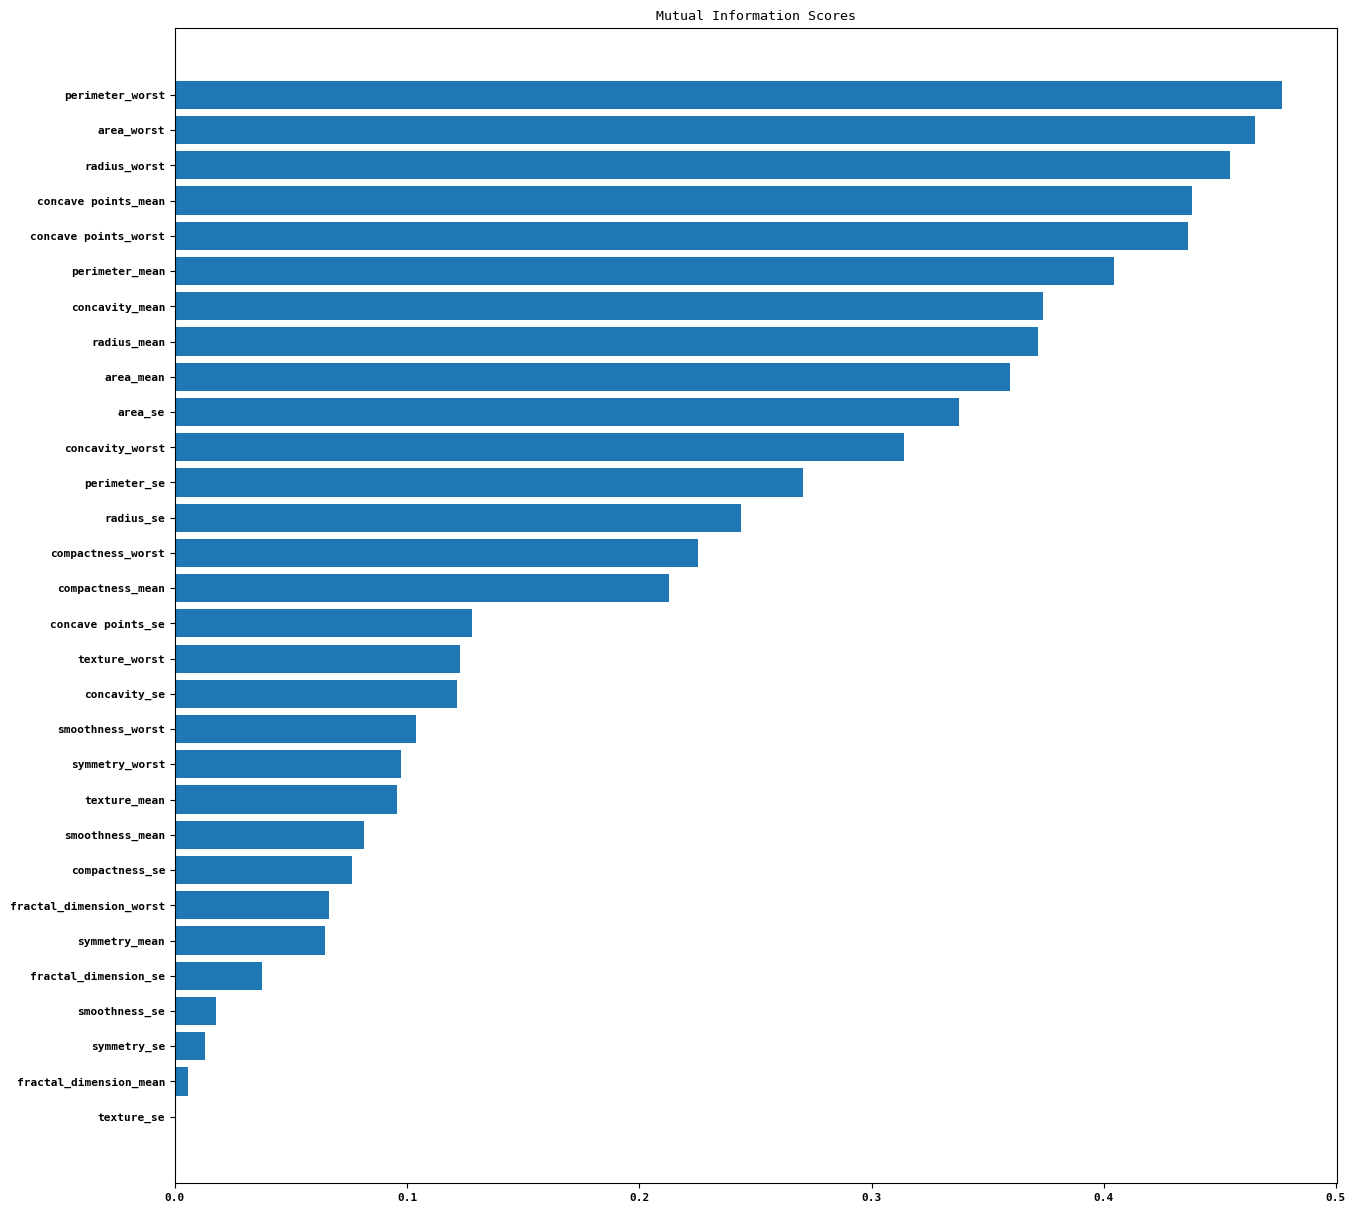

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(15, 15))
plot_mi_scores(mi_scores)

<Axes: >

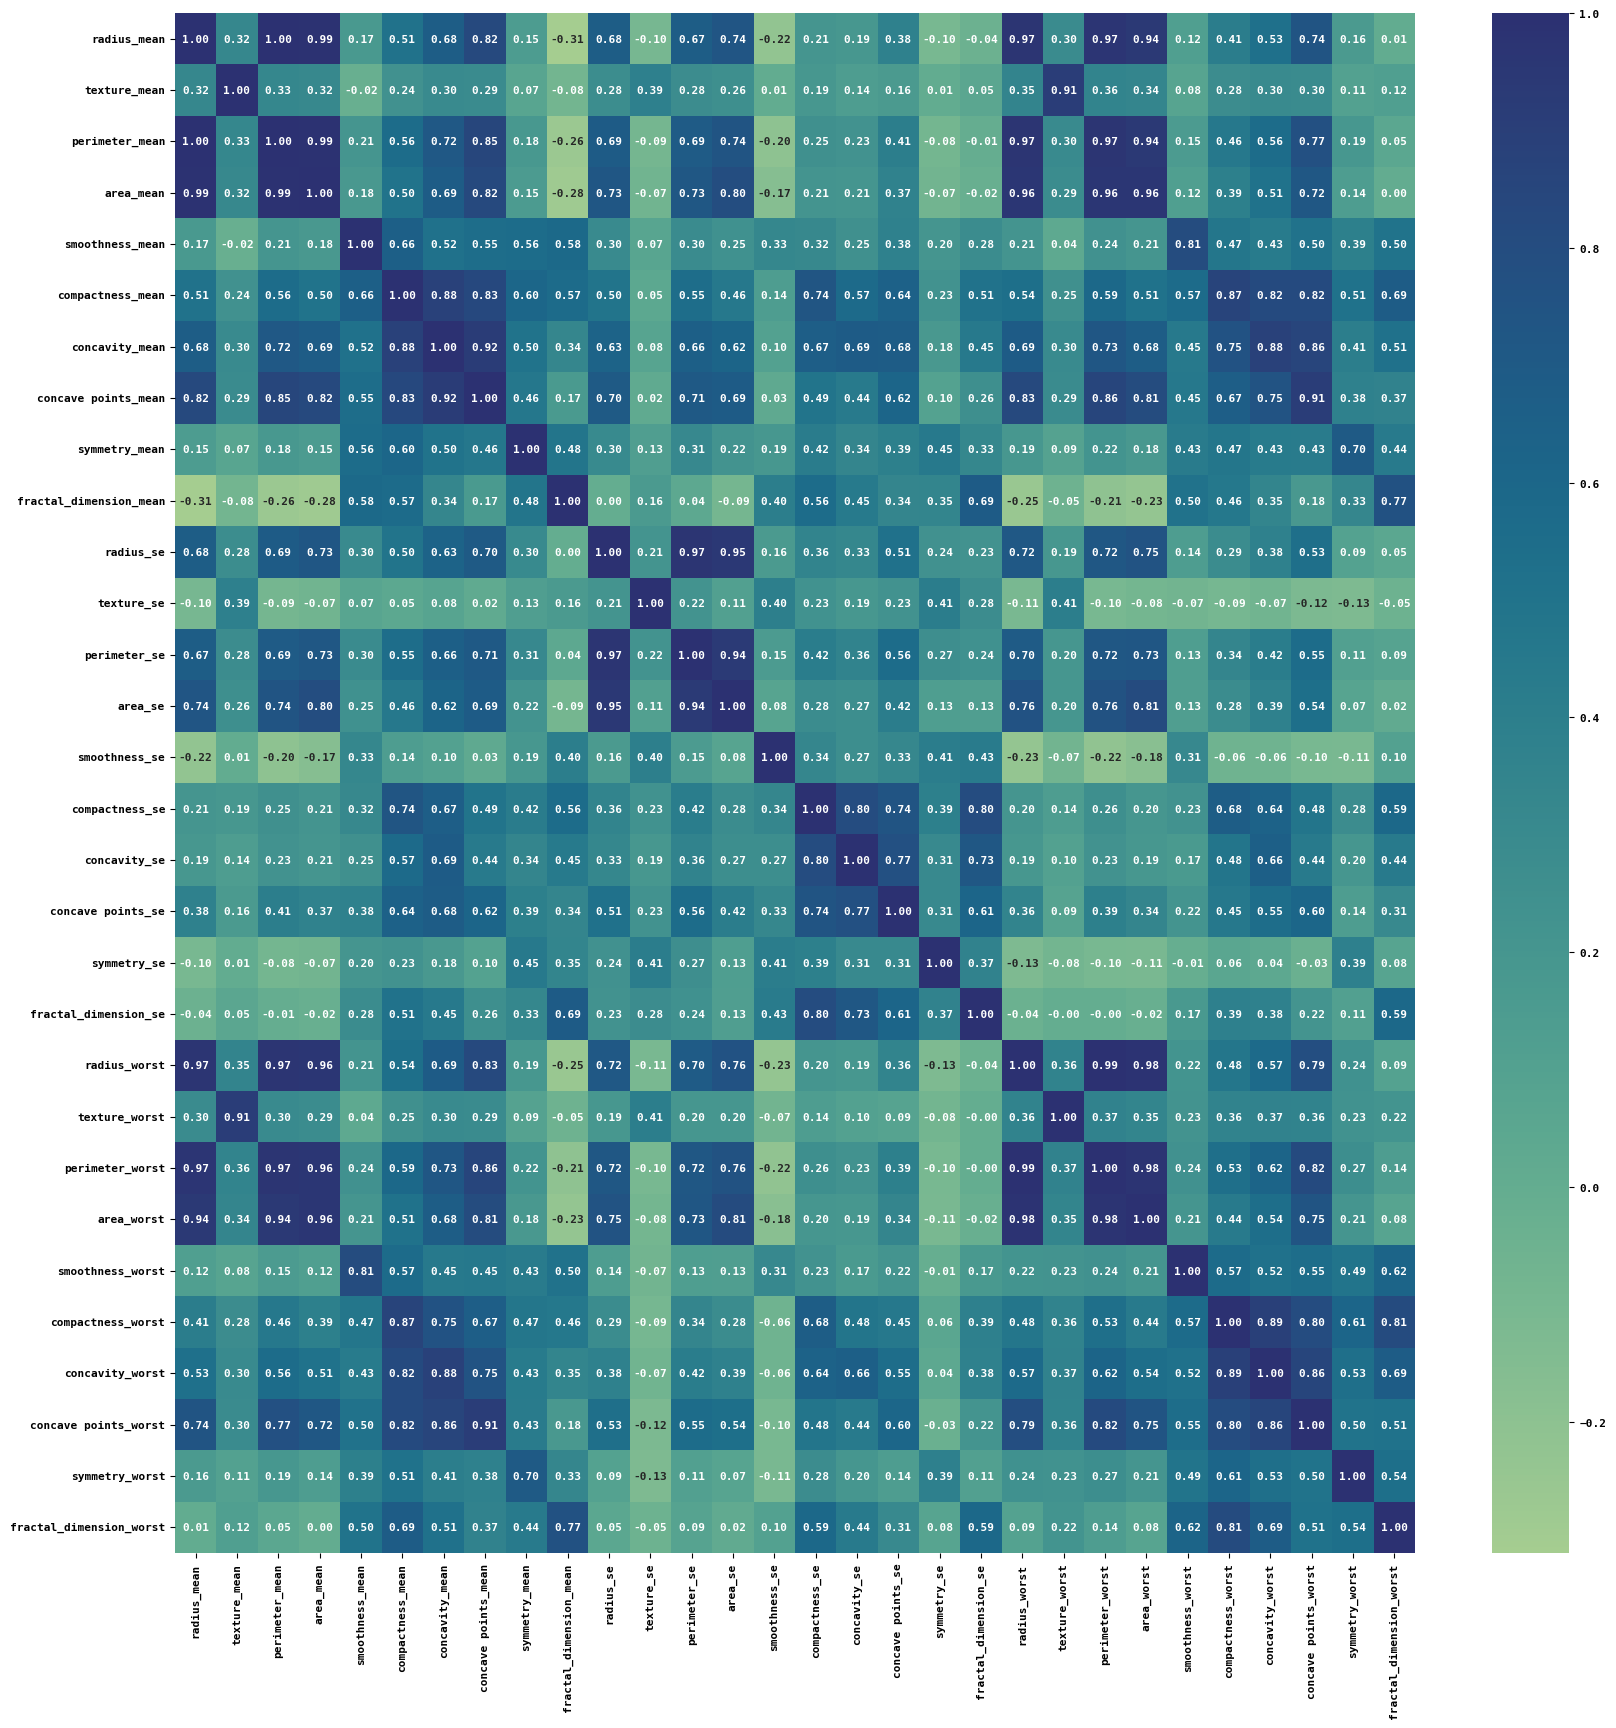

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(featuresdf.corr(), annot=True, fmt=".2f", cmap="crest")

# **Model Creation**

In [ ]:
from sklearn.model_selection import train_test_split

x = list(df.columns[2:32])
x = df[x]
y = target

xTrain, xTest,yTrain,yTest = train_test_split(x,y, test_size=.3, random_state=0)

# **Logistic Regression**

Logistic regression estimates the probability of an event occurring, such as 0 or 1, based on a given data set of independent variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

LRmodel = LogisticRegression(solver='liblinear', random_state=0, multi_class='ovr').fit(xTrain, yTrain)
logregpreds = LRmodel.predict(xTest)
score =accuracy_score(yTest, logregpreds)
print(f'Logistic Regression accuracy: {score}')

Logistic Regression accuracy: 0.9649122807017544


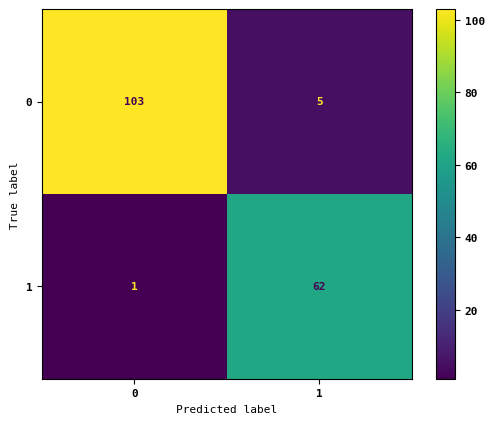

In [ ]:

ConfusionMatrixDisplay.from_estimator(LRmodel, xTest, yTest)


# **Random Forest Algorithm**

Works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Instantiate the Random Forest classifier model
rf_classifier = RandomForestClassifier(random_state=0)

# Train the model
rf_classifier.fit(xTrain, yTrain)

# Predict on the test set
rf_preds = rf_classifier.predict(xTest)

# Evaluate the model using accuracy
accuracy = accuracy_score(yTest, rf_preds)
print("Random Forest Classifier Accuracy:", round(accuracy, 4))

# Generate confusion matrix
conf_matrix = confusion_matrix(yTest, rf_preds)


Random Forest Classifier Accuracy: 0.9591


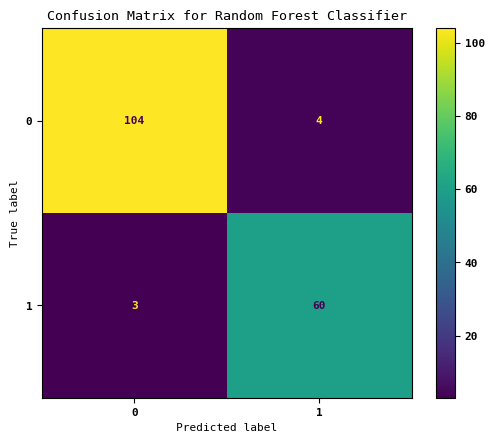

In [ ]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot()
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


# **KNN (K-Nearest Neighbour) Algorithm**

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Nearest Neighbors classifier model
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(xTrain, yTrain)

# Predict on the test set
knn_preds = knn_classifier.predict(xTest)

# Evaluate the model using accuracy
accuracy = accuracy_score(yTest, knn_preds)
print("K-Nearest Neighbors Classifier Accuracy:", round(accuracy, 4))

# Generate confusion matrix
conf_matrix = confusion_matrix(yTest, knn_preds)


K-Nearest Neighbors Classifier Accuracy: 0.9474


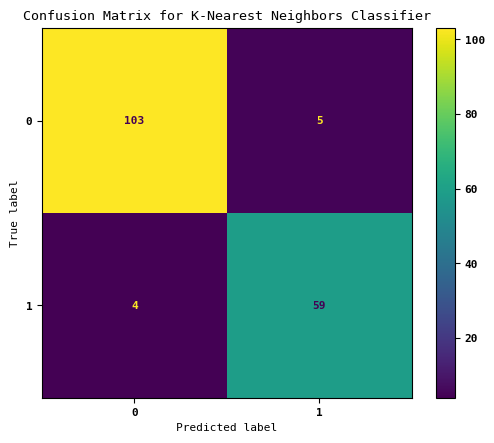

In [ ]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_classifier.classes_)
disp.plot()
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.show()

# **XGBoost Algorithm**

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting”

In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

XGmodel = xgb.XGBClassifier(learning_rate = .5, n_estimators = 100, max_depth = 5, objective="binary:logistic").fit(xTrain,yTrain, eval_metric='logloss')
xgpred = XGmodel.predict(xTest)
xg = accuracy_score(yTest, xgpred)
print(f"The accuracy score of the XGBOOST classifier is {round(xg*100,4)}%")

The accuracy score of the XGBOOST classifier is 95.9064%


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

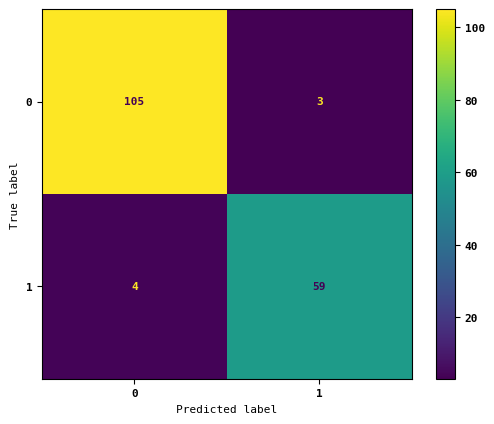

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(XGmodel, xTest, yTest)
df.columns[2:32]

# **Comparison of different classifiers**

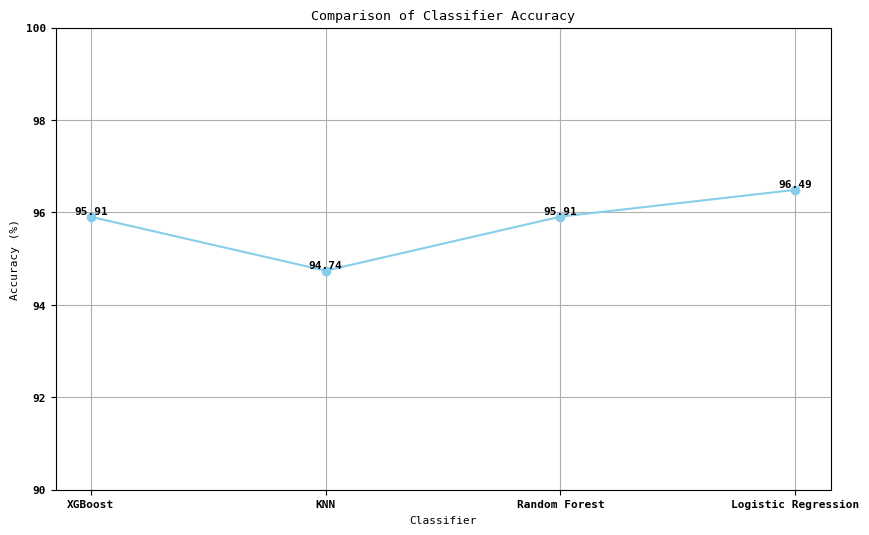

In [ ]:
import matplotlib.pyplot as plt

# List of classifiers and their accuracy scores
classifiers = ['XGBoost', 'KNN', 'Random Forest', 'Logistic Regression']
accuracies = [95.9064, 94.74, 95.91, 96.49]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(classifiers, accuracies, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Classifier Accuracy')
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.grid(True)      # Add gridlines for better readability

# Annotate points with their accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()


# **Error Rate vs Accuracy for different classifiers**

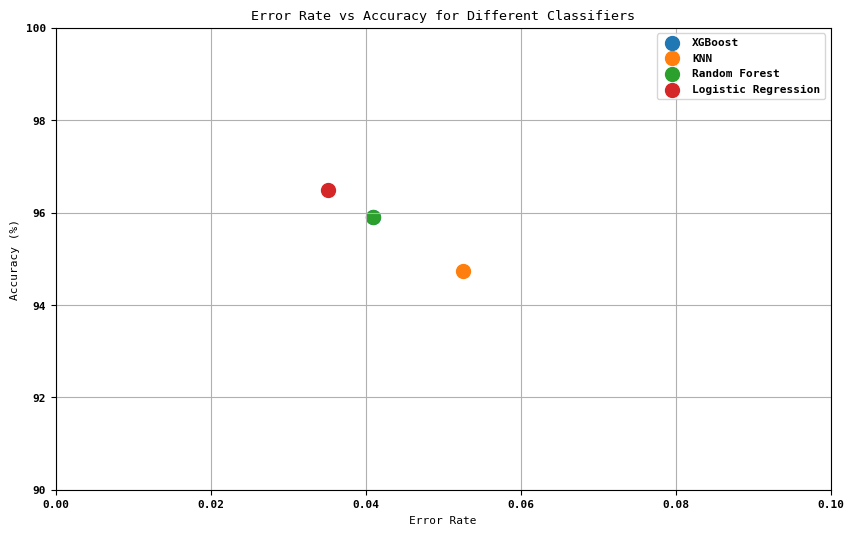

In [ ]:
import matplotlib.pyplot as plt

# List of classifiers and their accuracy scores
classifiers = ['XGBoost', 'KNN', 'Random Forest', 'Logistic Regression']
accuracies = [95.9064, 94.74, 95.91, 96.49]

# Calculate error rates
error_rates = [1 - acc / 100 for acc in accuracies]

# Plotting the error rate vs accuracy graph with labels
plt.figure(figsize=(10, 6))
for i, classifier in enumerate(classifiers):
    plt.scatter(error_rates[i], accuracies[i], label=classifier, s=100)

# Add labels and title
plt.xlabel('Error Rate')
plt.ylabel('Accuracy (%)')
plt.title('Error Rate vs Accuracy for Different Classifiers')

# Set limits and grid
plt.xlim(0, 0.1)  # Set x-axis limits for better visualization
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.grid(True)  # Add gridlines for better readability

# Add legend
plt.legend()

# Show plot
plt.show()
